In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('marvel-wikia-data.csv')

In [4]:
df[:5]

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


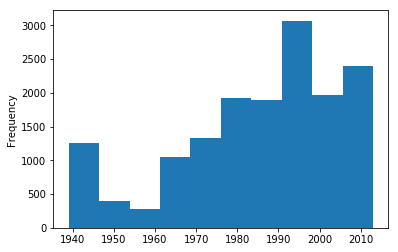

In [5]:
df['year'].plot(kind="hist")

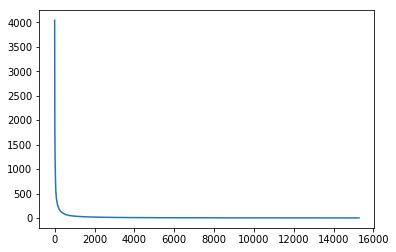

In [6]:
df.num_appearances.plot(kind="line")

In [7]:
plt.show()

In [8]:
df.num_appearances.describe()

count    15280.000000
mean        17.033377
std         96.372959
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       4043.000000
Name: num_appearances, dtype: float64

In [9]:
df.eye[:3]

0    Hazel Eyes
1     Blue Eyes
2     Blue Eyes
Name: eye, dtype: object

In [10]:
df.alignment[:3]

0       Good Characters
1       Good Characters
2    Neutral Characters
Name: alignment, dtype: object

<h1>Total number of appearances by alignment</h1>

In [11]:
is_good_align = df.alignment.str.contains("Good", na=False)
is_neutral_align = df.alignment.str.contains("Neutral", na=False)
is_bad_align = df.alignment.str.contains("Bad", na=False)
df[is_bad_align].num_appearances[:10]

43     721.0
47     692.0
69     503.0
92     382.0
94     376.0
101    371.0
112    332.0
122    317.0
123    316.0
129    306.0
Name: num_appearances, dtype: float64

[0, 50, 0, 4000]

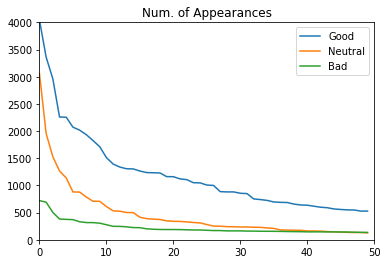

In [12]:
num_top = 50
ax = df[is_good_align].reset_index().num_appearances[:num_top].plot(kind="line", label="Good", legend=True, title="Num. of Appearances")
df[is_neutral_align].reset_index().num_appearances[:num_top].plot(kind="line", ax=ax, label="Neutral", legend=True)
df[is_bad_align].reset_index().num_appearances[:num_top].plot(kind="line", ax=ax, label="Bad", legend=True)
plt.axis([0, num_top, 0, 4000])

In [13]:
def label_appear_per_year(row):
    return row['num_appearances']/(2019 - row['year'])

df['appear_per_year'] = df.apply(label_appear_per_year, axis=1)

In [14]:
df.sort_values('appear_per_year', ascending=False)

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year,appear_per_year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,70.929825
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,68.022222
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,52.875000
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,43.076923
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0,38.879310
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0,35.724138
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0,35.385965
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0,34.910714
13,2614,Ororo Munroe (Earth-616),\/Ororo_Munroe_(Earth-616),Public Identity,Good Characters,Blue Eyes,White Hair,Female Characters,NaN,Living Characters,1512.0,May-75,1975.0,34.363636
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0,33.344828


In [15]:
# to-do: stacked line graph showing the number of new characters of each alignment
#        number of one-off characters per decade?
#        number/percentage of one-off characters per alignment? maybe %-of for heroes?

In [16]:
in_the_40s = (df.year >= 1940) & (df.year < 1950)
in_the_50s = (df.year >= 1950) & (df.year < 1960)
in_the_60s = (df.year >= 1960) & (df.year < 1970)
in_the_70s = (df.year >= 1970) & (df.year < 1980)
in_the_80s = (df.year >= 1980) & (df.year < 1990)
in_the_90s = (df.year >= 1990) & (df.year < 2000)
in_the_00s = (df.year >= 2000) & (df.year < 2010)
in_the_10s = (df.year >= 2010) & (df.year < 2020)
one_off_char = (df.num_appearances == 1)

In [17]:
# percentage of one-off characters per decade

In [18]:
(df[one_off_char & in_the_40s].alignment.value_counts() / df[in_the_40s].alignment.value_counts())

Bad Characters        0.892895
Good Characters       0.415978
Neutral Characters    0.878788
Name: alignment, dtype: float64

In [19]:
df[one_off_char & in_the_50s].alignment.value_counts() / df[in_the_50s].alignment.value_counts()

Bad Characters        0.619048
Good Characters       0.100000
Neutral Characters    0.405405
Name: alignment, dtype: float64

In [20]:
df[one_off_char & in_the_60s].alignment.value_counts() / df[in_the_60s].alignment.value_counts()

Bad Characters        0.184692
Good Characters       0.098039
Neutral Characters    0.151515
Name: alignment, dtype: float64

In [21]:
df[one_off_char & in_the_70s].alignment.value_counts() / df[in_the_70s].alignment.value_counts()

Bad Characters        0.180887
Good Characters       0.121359
Neutral Characters    0.119718
Name: alignment, dtype: float64

In [22]:
df[one_off_char & in_the_80s].alignment.value_counts() / df[in_the_80s].alignment.value_counts()

Bad Characters        0.238043
Good Characters       0.149852
Neutral Characters    0.238095
Name: alignment, dtype: float64

In [23]:
df[one_off_char & in_the_90s].alignment.value_counts() / df[in_the_90s].alignment.value_counts()

Bad Characters        0.284230
Good Characters       0.182912
Neutral Characters    0.268793
Name: alignment, dtype: float64

In [24]:
df[one_off_char & in_the_00s].alignment.value_counts() / df[in_the_00s].alignment.value_counts()

Good Characters       0.250459
Bad Characters        0.237069
Neutral Characters    0.324597
Name: alignment, dtype: float64

In [25]:
df[one_off_char & in_the_10s].alignment.value_counts() / df[in_the_10s].alignment.value_counts()

Bad Characters        0.233161
Good Characters       0.243243
Neutral Characters    0.392562
Name: alignment, dtype: float64

<BarContainer object of 7 artists>

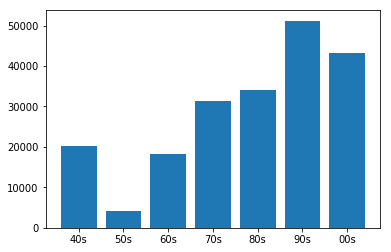

In [26]:
# new characters per decade
nums = [df[in_the_40s].size,
    df[in_the_50s].size,
    df[in_the_60s].size,
    df[in_the_70s].size,
    df[in_the_80s].size,
    df[in_the_90s].size,
    df[in_the_00s].size]
labels = ["40s", "50s", "60s", "70s", "80s", "90s", "00s"]
plt.bar(labels, nums)

<BarContainer object of 7 artists>

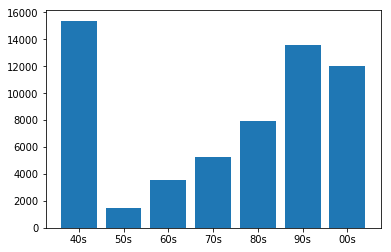

In [27]:
# one-off characters per decade
one_off_nums = [df[in_the_40s & one_off_char].size,
    df[in_the_50s & one_off_char].size,
    df[in_the_60s & one_off_char].size,
    df[in_the_70s & one_off_char].size,
    df[in_the_80s & one_off_char].size,
    df[in_the_90s & one_off_char].size,
    df[in_the_00s & one_off_char].size]
labels = ["40s", "50s", "60s", "70s", "80s", "90s", "00s"]
plt.bar(labels, one_off_nums)

<h1>Percentage of one-off characters per decade</h1>

<BarContainer object of 7 artists>

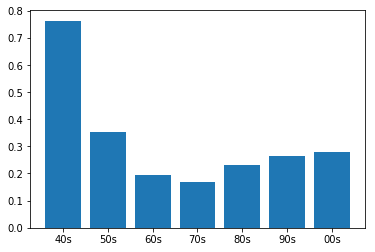

In [28]:
# % of one-off characters per decade
nums = [df[in_the_40s & one_off_char].size / df[in_the_40s].size,
    df[in_the_50s & one_off_char].size / df[in_the_50s].size,
    df[in_the_60s & one_off_char].size / df[in_the_60s].size,
    df[in_the_70s & one_off_char].size / df[in_the_70s].size,
    df[in_the_80s & one_off_char].size / df[in_the_80s].size,
    df[in_the_90s & one_off_char].size / df[in_the_90s].size,
    df[in_the_00s & one_off_char].size / df[in_the_00s].size]
labels = ["40s", "50s", "60s", "70s", "80s", "90s", "00s"]
plt.bar(labels, nums)

<h1>Number of one-off characters per decade vs. Total</h1>

Text(0.5, 1.0, 'One-off Characters per Decade')

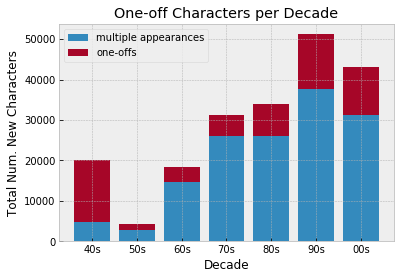

In [29]:
# non-one-off chars per decade
# one-off characters per decade
no_one_off_nums = [df[in_the_40s].size - df[in_the_40s & one_off_char].size,
    df[in_the_50s].size - df[in_the_50s & one_off_char].size,
    df[in_the_60s].size - df[in_the_60s & one_off_char].size,
    df[in_the_70s].size - df[in_the_70s & one_off_char].size,
    df[in_the_80s].size - df[in_the_80s & one_off_char].size,
    df[in_the_90s].size - df[in_the_90s & one_off_char].size,
    df[in_the_00s].size - df[in_the_00s & one_off_char].size]
labels = ["40s", "50s", "60s", "70s", "80s", "90s", "00s"]
mpl.style.use("bmh")
plt.bar(labels, no_one_off_nums, label="multiple appearances")
plt.bar(labels, one_off_nums, bottom = no_one_off_nums, label="one-offs")
plt.legend(loc="upper left")
plt.xlabel("Decade")
plt.ylabel("Total Num. New Characters")
plt.title("One-off Characters per Decade")

<h1>Number of new characters per decade by alignment</h1>

In [30]:
def set_by_decade(bool_func):
    return [df[in_the_40s & bool_func].size,
    df[in_the_50s & bool_func].size,
    df[in_the_60s & bool_func].size,
    df[in_the_70s & bool_func].size,
    df[in_the_80s & bool_func].size,
    df[in_the_90s & bool_func].size,
    df[in_the_00s & bool_func].size]

def perc_by_decade(bool_func1, bool_func2):
    return [df[in_the_40s & bool_func1 & bool_func2].size / df[in_the_40s & bool_func1].size,
    df[in_the_50s & bool_func1 & bool_func2].size / df[in_the_50s & bool_func1].size,
    df[in_the_60s & bool_func1 & bool_func2].size / df[in_the_60s & bool_func1].size,
    df[in_the_70s & bool_func1 & bool_func2].size / df[in_the_70s & bool_func1].size,
    df[in_the_80s & bool_func1 & bool_func2].size / df[in_the_80s & bool_func1].size,
    df[in_the_90s & bool_func1 & bool_func2].size / df[in_the_90s & bool_func1].size,
    df[in_the_00s & bool_func1 & bool_func2].size / df[in_the_00s & bool_func1].size]

Text(0.5, 1.0, 'Character Alignment per Decade')

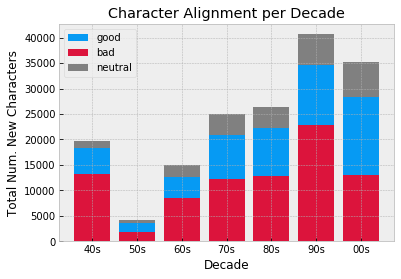

In [31]:
num_good_per_decade = set_by_decade(is_good_align)
num_neutral_per_decade = set_by_decade(is_neutral_align)
num_bad_per_decade = set_by_decade(is_bad_align)
decade_labels = ["40s", "50s", "60s", "70s", "80s", "90s", "00s"]
plt.bar(labels, num_good_per_decade, bottom = num_bad_per_decade, label="good", color='xkcd:azure')
plt.bar(labels, num_bad_per_decade, label="bad", color='crimson')
total_num_good_or_bad = [sum(x) for x in zip(num_good_per_decade, num_bad_per_decade)]
plt.bar(labels, num_neutral_per_decade, bottom = total_num_good_or_bad, label="neutral", color='grey')
plt.legend(loc="upper left")
plt.xlabel("Decade")
plt.ylabel("Total Num. New Characters")
plt.title("Character Alignment per Decade")

In [32]:
# zip combines two lists element-wise as tuples
[sum(x) for x in zip(num_good_per_decade, num_bad_per_decade)]

[18284, 3584, 12698, 20958, 22316, 34538, 28252]

<h1>Number of times character has had a "doppleganger" character <p>(character mimiced by some other character)</h1>

In [33]:
names_set = {name[:name.find("(") - 1] for name in df.name.tolist()}

In [34]:
df['hero_name'] = df.name.apply(lambda x: x[:x.find("(")].strip())

In [35]:
df['hero_name'].value_counts()[:20]

Peter Parker           10
Charlie                10
Robert Bruce Banner     7
Cyclops                 7
Charles Xavier          7
Thor Odinson            7
Reed Richards           7
James Madrox            7
Benjamin Grimm          7
Sam                     7
Thunder                 6
Vision                  6
Fang                    6
James Howlett           6
Bill                    6
Oracle                  6
Angel                   6
Michael van Patrick     6
Taurus                  5
Khan                    5
Name: hero_name, dtype: int64

In [36]:
df.sex.value_counts(dropna=False)

Male Characters           11638
Female Characters          3837
NaN                         854
Agender Characters           45
Genderfluid Characters        2
Name: sex, dtype: int64

In [37]:
df[df["hero_name"] == "Peter Parker"]

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year,appear_per_year,hero_name
148,2511,Peter Parker (Ben Reilly) (Earth-616),\/Peter_Parker_(Ben_Reilly)_(Earth-616),Secret Identity,Good Characters,Hazel Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,263.0,Oct-75,1975.0,5.977273,Peter Parker
303,1904,Peter Parker (Kaine) (Earth-616),\/Peter_Parker_(Kaine)_(Earth-616),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,137.0,Dec-94,1994.0,5.480000,Peter Parker
1067,38680,Peter Parker (Doppelganger) (Earth-616),\/Peter_Parker_(Doppelganger)_(Earth-616),Secret Identity,Bad Characters,White Eyes,No Hair,Male Characters,NaN,Living Characters,35.0,Jun-92,1992.0,1.296296,Peter Parker
1069,6562,Peter Parker (Spidercide) (Earth-616),\/Peter_Parker_(Spidercide)_(Earth-616),Secret Identity,Bad Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Deceased Characters,35.0,Mar-95,1995.0,1.458333,Peter Parker
2847,28149,Peter Parker (Spider-Skeleton) (Earth-616),\/Peter_Parker_(Spider-Skeleton)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Deceased Characters,12.0,Feb-96,1996.0,0.521739,Peter Parker
3861,476433,Peter Parker (Jack) (Earth-616),\/Peter_Parker_(Jack)_(Earth-616),Secret Identity,Neutral Characters,Hazel Eyes,Bald,Male Characters,NaN,Deceased Characters,8.0,Mar-95,1995.0,0.333333,Peter Parker
5011,121669,Peter Parker (Skrull) (Earth-616),\/Peter_Parker_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,6.0,8-Jun,2008.0,0.545455,Peter Parker
7752,476435,Peter Parker (Guardian) (Earth-616),\/Peter_Parker_(Guardian)_(Earth-616),Secret Identity,Bad Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Deceased Characters,3.0,Mar-95,1995.0,0.125000,Peter Parker
12034,721820,Peter Parker (Counter-Earth) (Earth-616),\/Peter_Parker_(Counter-Earth)_(Earth-616),No Dual Identity,NaN,NaN,NaN,Male Characters,NaN,Deceased Characters,1.0,Oct-72,1972.0,0.021277,Peter Parker
15238,714290,Peter Parker (Robot) (Earth-616),\/Peter_Parker_(Robot)_(Earth-616),No Dual Identity,NaN,NaN,NaN,Male Characters,NaN,Deceased Characters,1.0,NaN,NaN,NaN,Peter Parker


<h1>Deaths per decade by gender</h1>

In [38]:
dead_males_by_decade = set_by_decade((df['sex'] == "Male Characters") & (df['alive'] == "Deceased Characters"))
dead_females_by_decade = set_by_decade((df['sex'] == "Female Characters") & (df['alive'] == "Deceased Characters"))

In [39]:
print(dead_males_by_decade)
print(dead_females_by_decade)

[7380, 900, 3255, 5805, 4980, 6810, 8925]
[345, 165, 450, 1530, 1665, 2310, 3675]


In [40]:
perc_dead_males_by_decade = perc_by_decade((df['sex'] == "Male Characters"), (df['alive'] == "Deceased Characters"))
perc_dead_females_by_decade = perc_by_decade((df['sex'] == "Female Characters"), (df['alive'] == "Deceased Characters"))

In [41]:
print(perc_dead_males_by_decade)
print(perc_dead_females_by_decade)

[0.39203187250996013, 0.2553191489361702, 0.21067961165048543, 0.23341375150784077, 0.1976190476190476, 0.1837312828814245, 0.2912383749388155]
[0.1597222222222222, 0.21153846153846154, 0.19607843137254902, 0.2334096109839817, 0.1767515923566879, 0.15991692627206647, 0.26572668112798264]


Text(0.5, 1.0, 'Deaths per Decade by Gender')

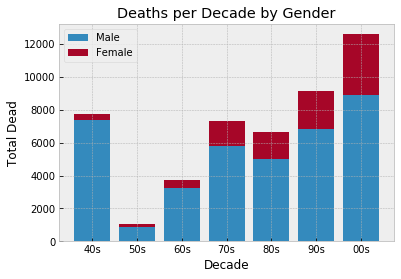

In [42]:
plt.bar(decade_labels, dead_males_by_decade, label="Male")
plt.bar(decade_labels, dead_females_by_decade, bottom=dead_males_by_decade, label="Female")
plt.legend(loc="upper left")
plt.xlabel("Decade")
plt.ylabel("Total Dead")
plt.title("Deaths per Decade by Gender")

<h1>Eye Color by Alignment</h1>

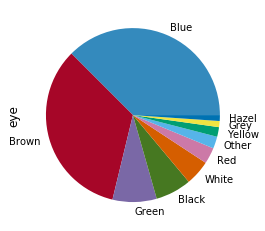

In [43]:
df[is_good_align].eye.dropna().str.replace(" Eyes","") \
    .apply(lambda x: x if x in ("Blue", "Brown", "Green", "Black", "White", "Red", "Yellow", "Grey", "Hazel") else "Other") \
    .value_counts().plot(kind="pie")


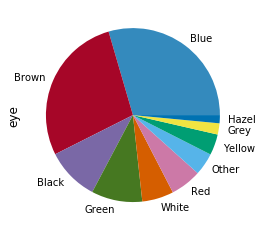

In [44]:
df[is_neutral_align].eye.dropna().str.replace(" Eyes","") \
    .apply(lambda x: x if x in ("Blue", "Brown", "Green", "Black", "White", "Red", "Yellow", "Grey", "Hazel") else "Other") \
    .value_counts().plot(kind="pie")

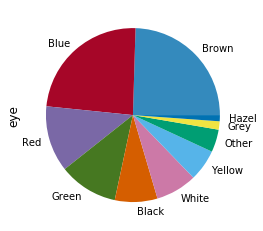

In [45]:
df[is_bad_align].eye.dropna().str.replace(" Eyes","") \
    .apply(lambda x: x if x in ("Blue", "Brown", "Green", "Black", "White", "Red", "Yellow", "Grey", "Hazel") else "Other") \
    .value_counts().plot(kind="pie")

<h1>Alignment for characters with < 2 eyes</h1>

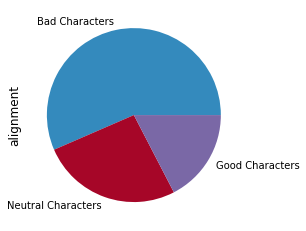

In [46]:
df[(df['eye'] == "No Eyes") | (df['eye'] == "One Eye")].alignment.value_counts().plot(kind='pie')
mpl.style.use('fivethirtyeight')

<h1>Sexuality by alignment</h1>

In [47]:
df[(df['gsm'].notnull()) & is_good_align].sort_values('num_appearances', ascending=False)[:5]

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year,appear_per_year,hero_name
28,6545,Natalia Romanova (Earth-616),\/Natalia_Romanova_(Earth-616),Public Identity,Good Characters,Green Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,1050.0,Apr-64,1964.0,19.090909,Natalia Romanova
42,1818,Hercules (Earth-616),\/Hercules_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,725.0,Oct-65,1965.0,13.425926,Hercules
117,2182,Heather Douglas (Earth-616),\/Heather_Douglas_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Bald,Female Characters,Bisexual Characters,Living Characters,323.0,Jan-73,1973.0,7.021739,Heather Douglas
125,2238,Jean-Paul Beaubier (Earth-616),\/Jean-Paul_Beaubier_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,313.0,Apr-79,1979.0,7.825000,Jean-Paul Beaubier
175,2335,Jonathan Clay (Earth-616),\/Jonathan_Clay_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Red Hair,Male Characters,Homosexual Characters,Living Characters,237.0,Aug-60,1960.0,4.016949,Jonathan Clay


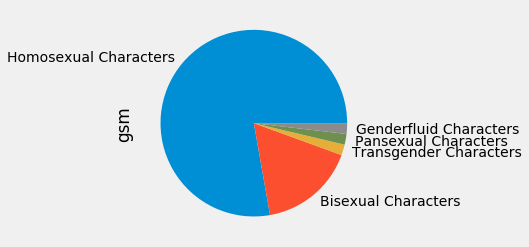

In [48]:
df[(df['gsm'].notnull()) & is_good_align].gsm.value_counts().plot(kind="pie")

In [49]:
df[(df['gsm'].notnull()) & is_neutral_align].sort_values('num_appearances', ascending=False)[:5]

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year,appear_per_year,hero_name
45,2307,Elizabeth Braddock (Earth-616),\/Elizabeth_Braddock_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Purple Hair,Female Characters,Bisexual Characters,Living Characters,708.0,Dec-76,1976.0,16.465116,Elizabeth Braddock
61,2042,Loki Laufeyson (Earth-616),\/Loki_Laufeyson_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532.0,Aug-49,1949.0,7.600000,Loki Laufeyson
71,1409,Deadpool (Wade Wilson),\/Deadpool_(Wade_Wilson),Secret Identity,Neutral Characters,Brown Eyes,Bald,Male Characters,Transvestites,Living Characters,500.0,Feb-91,1991.0,17.857143,Deadpool
426,195422,Victoria Hand (Earth-616),\/Victoria_Hand_(Earth-616),No Dual Identity,Neutral Characters,Hazel Eyes,Black Hair,Female Characters,Homosexual Characters,Deceased Characters,98.0,9-Feb,2009.0,9.800000,Victoria Hand
488,1424,Irene Adler (Earth-616),\/Irene_Adler_(Earth-616),Secret Identity,Neutral Characters,White Eyes,Silver Hair,Female Characters,Bisexual Characters,Deceased Characters,82.0,Jan-81,1981.0,2.157895,Irene Adler


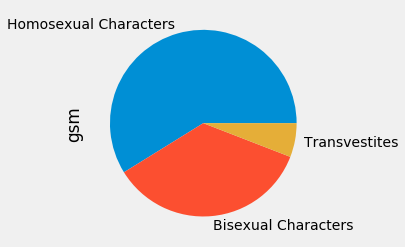

In [50]:
df[(df['gsm'].notnull()) & is_neutral_align].gsm.value_counts().plot(kind="pie")

In [51]:
df[(df['gsm'].notnull()) & is_bad_align].sort_values('num_appearances', ascending=False)[:5]

,page_id,name,urlslug,id,alignment,eye,hair,sex,gsm,alive,num_appearances,date_first_appearance,year,appear_per_year,hero_name
101,55878,Raven Darkholme (Earth-616),\/Raven_Darkholme_(Earth-616),Secret Identity,Bad Characters,Yellow Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,371.0,Apr-78,1978.0,9.048780,Raven Darkholme
217,51769,Akihiro (Earth-616),\/Akihiro_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Bisexual Characters,Living Characters,189.0,6-Oct,2006.0,14.538462,Akihiro
758,2628,Deidre Wentworth (Earth-616),\/Deidre_Wentworth_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,49.0,Jul-91,1991.0,1.750000,Deidre Wentworth
935,1759,Sybil Dvorak (Earth-616),\/Sybil_Dvorak_(Earth-616),Secret Identity,Bad Characters,Brown Eyes,Brown Hair,Female Characters,Bisexual Characters,Living Characters,40.0,Jan-79,1979.0,1.000000,Sybil Dvorak
1446,22800,Sinclair Abbott (Earth-616),\/Sinclair_Abbott_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,Bisexual Characters,Deceased Characters,26.0,6-Feb,2006.0,2.000000,Sinclair Abbott


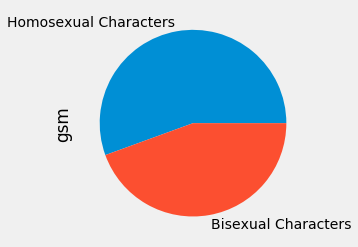

In [52]:
df[(df['gsm'].notnull()) & is_bad_align].gsm.value_counts().plot(kind="pie")

<h1> New LGBTQ character by decade </h1>

<BarContainer object of 7 artists>

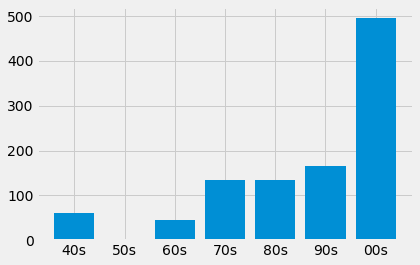

In [53]:
non_hetero_by_decade = set_by_decade(df['gsm'].notnull())
hetero_by_decade = set_by_decade(df['gsm'].isnull())
plt.bar(decade_labels, non_hetero_by_decade)

<BarContainer object of 7 artists>

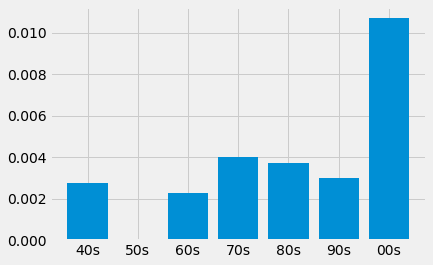

In [54]:
perc_lgbtq_by_decade = perc_by_decade(True, df['gsm'].notnull())
plt.bar(decade_labels, perc_lgbtq_by_decade)

In [72]:
df['weight_num_appear'] = df['num_appearances'] / (2015 - df['year'])

In [73]:
df[['name', 'year', 'num_appearances', 'weight_num_appear']].sort_values('weight_num_appear', ascending=False)[:20]

,name,year,num_appearances,weight_num_appear
0,Spider-Man (Peter Parker),1962.0,4043.0,76.283019
2,"Wolverine (James \""Logan\"" Howlett)",1974.0,3061.0,74.658537
3,"Iron Man (Anthony \""Tony\"" Stark)",1963.0,2961.0,56.942308
1,Captain America (Steven Rogers),1941.0,3360.0,45.405405
5,Benjamin Grimm (Earth-616),1961.0,2255.0,41.759259
6,Reed Richards (Earth-616),1961.0,2072.0,38.370370
7,Hulk (Robert Bruce Banner),1962.0,2017.0,38.056604
13,Ororo Munroe (Earth-616),1975.0,1512.0,37.800000
8,Scott Summers (Earth-616),1963.0,1955.0,37.596154
9,Jonathan Storm (Earth-616),1961.0,1934.0,35.814815
